In [4]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [5]:
START = "2011-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [6]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,583.500000,588.474976,577.275024,579.025024,446.351959,1405042
1,2011-01-04,581.950012,583.075012,569.049988,572.375000,441.225647,2502868
2,2011-01-05,572.625000,582.950012,570.875000,579.474976,446.698792,3069674
3,2011-01-06,584.000000,591.000000,576.549988,585.849976,451.612976,2846720
4,2011-01-07,588.000000,593.424988,569.075012,571.325012,440.416229,2532724


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,583.500000,588.474976,577.275024,579.025024,1405042
1,581.950012,583.075012,569.049988,572.375000,2502868
2,572.625000,582.950012,570.875000,579.474976,3069674
3,584.000000,591.000000,576.549988,585.849976,2846720
4,588.000000,593.424988,569.075012,571.325012,2532724


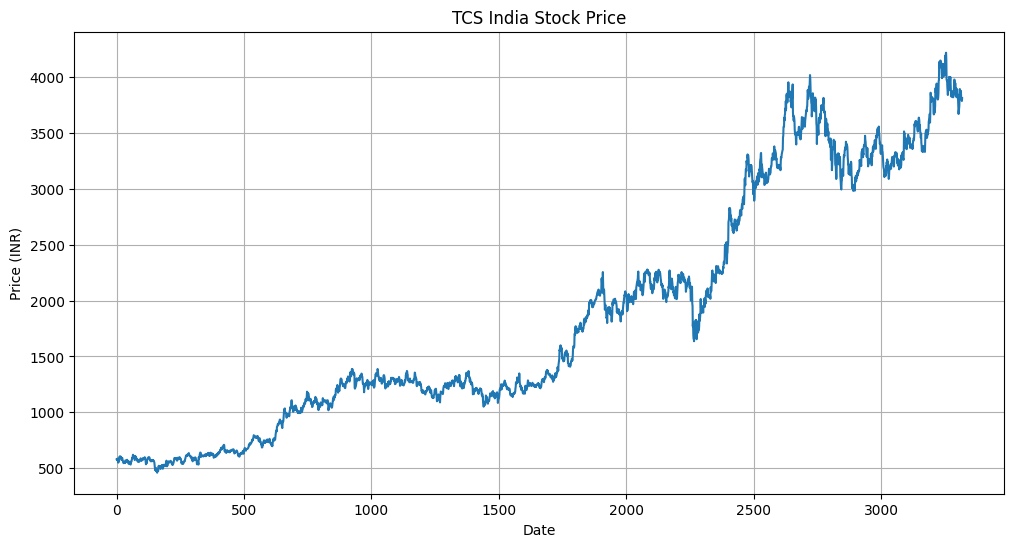

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [9]:
df

,Open,High,Low,Close,Volume
0,583.500000,588.474976,577.275024,579.025024,1405042
1,581.950012,583.075012,569.049988,572.375000,2502868
2,572.625000,582.950012,570.875000,579.474976,3069674
3,584.000000,591.000000,576.549988,585.849976,2846720
4,588.000000,593.424988,569.075012,571.325012,2532724
...,...,...,...,...,...
3314,3889.000000,3889.000000,3828.000000,3832.050049,1860730
3315,3826.050049,3842.000000,3795.050049,3815.100098,1774045
3316,3827.649902,3833.850098,3792.949951,3801.699951,1509050
3317,3796.000000,3809.949951,3780.050049,3787.250000,2846526


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3314    3942.253506
3315    3941.791506
3316    3940.962505
3317    3939.809004
3318    3938.486003
Name: Close, Length: 3319, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

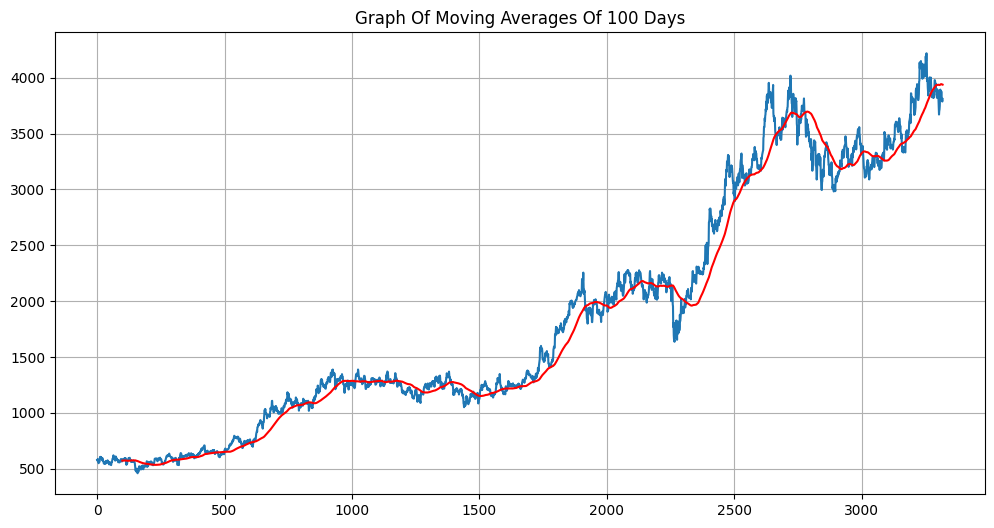

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3314    3745.900502
3315    3747.967753
3316    3750.065503
3317    3752.010503
3318    3754.125503
Name: Close, Length: 3319, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

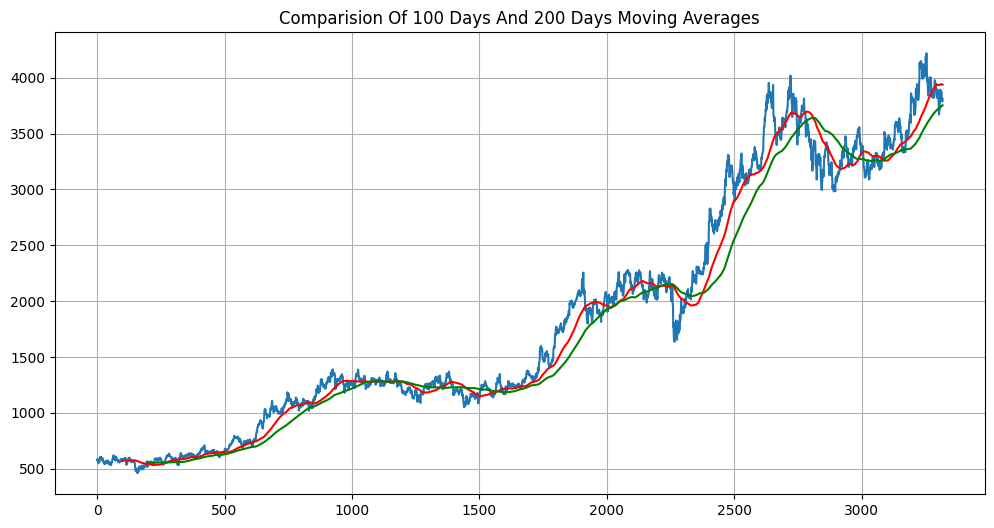

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [14]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2323, 7)
(996, 7)


In [15]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,583.500000,588.474976,577.275024,579.025024,446.351959,1405042
1,2011-01-04,581.950012,583.075012,569.049988,572.375000,441.225647,2502868
2,2011-01-05,572.625000,582.950012,570.875000,579.474976,446.698792,3069674
3,2011-01-06,584.000000,591.000000,576.549988,585.849976,451.612976,2846720
4,2011-01-07,588.000000,593.424988,569.075012,571.325012,440.416229,2532724


In [16]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2323,2020-06-16,2065.0,2073.949951,2031.000000,2045.800049,1896.890991,2146528
2324,2020-06-17,2046.0,2058.850098,2026.550049,2047.800049,1898.745239,2703527
2325,2020-06-18,2045.0,2059.199951,2025.199951,2038.099976,1889.751343,1944389
2326,2020-06-19,2042.0,2090.000000,2032.000000,2044.599976,1895.777954,5681758
2327,2020-06-22,2050.0,2052.250000,2019.150024,2027.949951,1880.340210,3196138


In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [20]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.06597305],
       [0.06231703],
       [0.06622042],
       ...,
       [0.88438223],
       [0.86890611],
       [0.86362828]])

In [21]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [22]:
x_train.shape

(2223, 100, 1)

Building the Model

In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Mrinal\OneDrive\Desktop\Stock-Price-Prediction-using-LSTM-FASTAPI-Streamlit\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [26]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 223ms/step - loss: 0.1231 - mean_absolute_error: 0.2555
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - loss: 0.0110 - mean_absolute_error: 0.0754
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - loss: 0.0089 - mean_absolute_error: 0.0658
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - loss: 0.0074 - mean_absolute_error: 0.0601
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - loss: 0.0080 - mean_absolute_error: 0.0626
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - loss: 0.0071 - mean_absolute_error: 0.0588
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - loss: 0.0068 - mean_absolute_error: 0.0572
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - loss: 0.0068 - mean_absolute_error: 0.0571
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - loss: 0.0059 - mean_absolute_error: 0.0533
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - loss: 0.0058 - mean_absolute_error: 0.0536
Epoch 11/

In [27]:
model.save('keras_model.h5')

In [28]:
test_close.shape

(996, 1)

In [29]:
past_100_days = pd.DataFrame(train_close[-100:])

In [30]:
test_df = pd.DataFrame(test_close)

In [31]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [32]:
print(type(past_100_days))


<class 'pandas.core.frame.DataFrame'>


In [33]:
final_df.head()

,0
0,2238.800049
1,2219.100098
2,2170.350098
3,2171.050049
4,2206.899902


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2332456 ],
       [0.22561854],
       [0.2067444 ],
       ...,
       [0.83834061],
       [0.83274614],
       [0.84184444]])

In [35]:
input_data.shape

(1096, 1)

Testing the Model

In [36]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(996, 100, 1)
(996,)


Making Predictions

In [38]:
y_pred = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step


In [39]:
y_pred.shape

(996, 1)

In [40]:
y_test

array([0.15852339, 0.15929772, 0.15554222, 0.15805877, 0.15161252,
       0.15445819, 0.15712957, 0.14702466, 0.18680557, 0.18014632,
       0.17259666, 0.17642962, 0.20163379, 0.21808817, 0.24269231,
       0.24528628, 0.22554103, 0.2199079 , 0.22687681, 0.22596694,
       0.2073638 , 0.23134845, 0.23167758, 0.21851408, 0.22128225,
       0.22792213, 0.21471988, 0.20707343, 0.20173058, 0.22085643,
       0.26071471, 0.24766738, 0.24900307, 0.24973864, 0.23918848,
       0.23746563, 0.24125983, 0.26007593, 0.25513962, 0.25028072,
       0.24915789, 0.24042747, 0.23930465, 0.23454254, 0.23889811,
       0.24522824, 0.2401371 , 0.23868524, 0.23703981, 0.23684623,
       0.23473612, 0.23893686, 0.2369623 , 0.23314881, 0.24038872,
       0.23616869, 0.24344726, 0.2567463 , 0.25260369, 0.26741262,
       0.27560106, 0.26764486, 0.26899993, 0.2856286 , 0.3310426 ,
       0.3310426 , 0.33553371, 0.31925354, 0.31497538, 0.32093773,
       0.34325757, 0.32177009, 0.26942585, 0.30428978, 0.30583

In [41]:
y_pred

array([[0.22269097],
       [0.22413445],
       [0.22473036],
       [0.22459646],
       [0.22391997],
       [0.22282074],
       [0.22145885],
       [0.22001159],
       [0.21850865],
       [0.2175132 ],
       [0.21724239],
       [0.21765149],
       [0.21866734],
       [0.22048275],
       [0.22338161],
       [0.22763729],
       [0.23313813],
       [0.23951495],
       [0.24631558],
       [0.25315756],
       [0.25966072],
       [0.2655758 ],
       [0.27089876],
       [0.2756775 ],
       [0.2798916 ],
       [0.2835782 ],
       [0.2868107 ],
       [0.28958935],
       [0.29188257],
       [0.29365993],
       [0.29506767],
       [0.29644987],
       [0.297943  ],
       [0.2995888 ],
       [0.30136794],
       [0.30316746],
       [0.30488443],
       [0.3064762 ],
       [0.3080397 ],
       [0.3096063 ],
       [0.31114057],
       [0.31259078],
       [0.31387535],
       [0.3149466 ],
       [0.31577775],
       [0.3163966 ],
       [0.31687367],
       [0.317

In [42]:
scaler.scale_

array([0.00038716])

In [43]:
scale_factor = 1/0.00038716
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

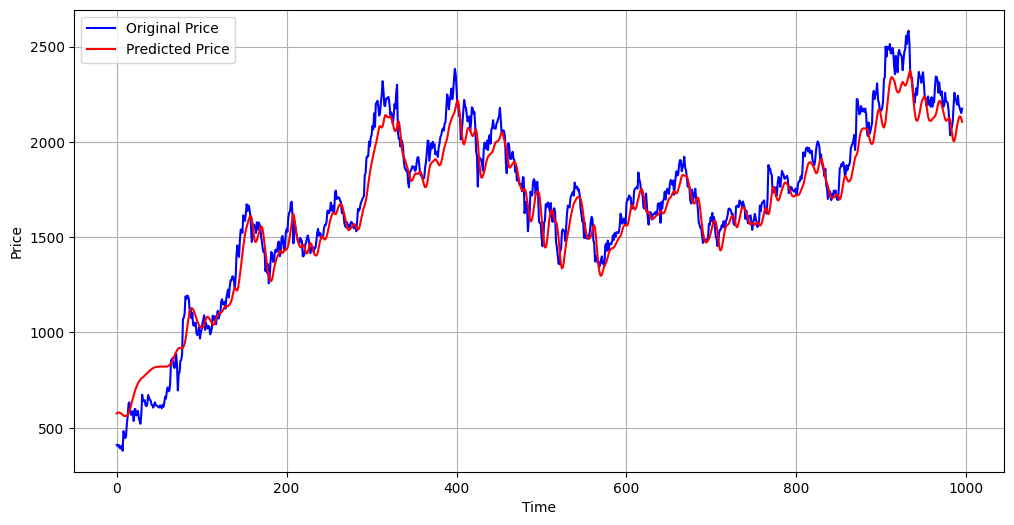

In [44]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Model Evaluation

In [45]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.79%


In [46]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.947643102566432


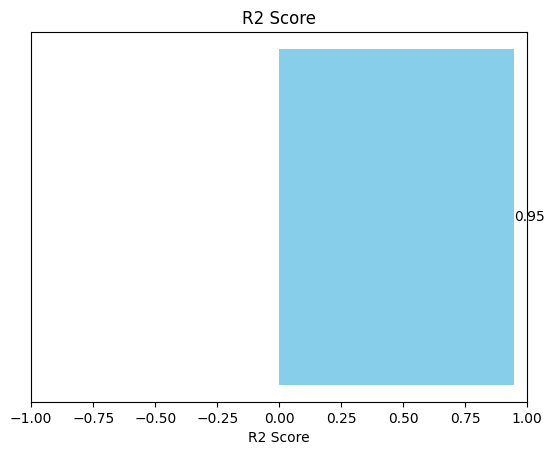

In [47]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

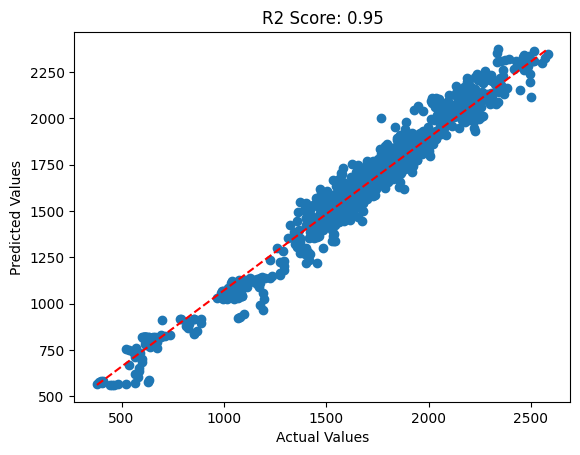

In [48]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()